In [1]:
# importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import util 

In [2]:
# Reading the car image and the mask generated by U-2-Net model 
img = plt.imread("img/test_car.jpg")
img_mask = plt.imread('img/test_car.png')

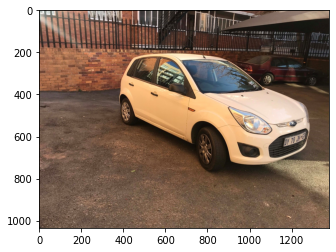

In [3]:
## displaying the car image
plt.imshow(img)

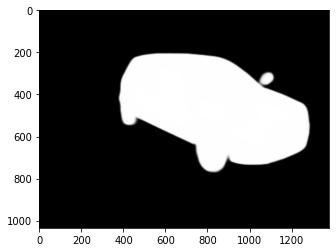

In [4]:
plt.imshow(img_mask)

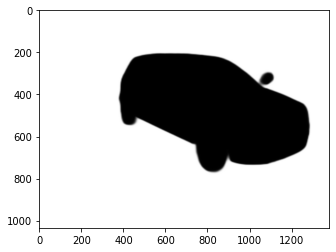

In [5]:
## inverting the masked image and Displaying it 
inverted_img = util.invert(img_mask)
plt.imshow(inverted_img)

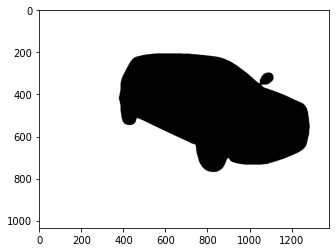

In [6]:
## Performing numpy.round() operation to round of the values to 1 and 0 to have the clean masked image
inverted_img = np.round(inverted_img)
plt.imshow(inverted_img)

## *Removing the unwanted extra part from the masked image*

In [7]:
# or x,y,w,h = 0, 0, 0, 0
x, y, w, h = np.repeat(0, 4)
# mouse click = False means mouse is not clicked
mouse_click = False
# Making a copy of inverted masked image
show_img = np.copy(inverted_img)

In [8]:
## mouse_select is a callback function which is used to select the area to be temoved from mask
def mouse_select(event,_x, _y, flag, pram):
    # declearing the values as global
    global show_img, x, y, w, h, mouse_click
    
    # reading event where left button of mouse in clicked
    if event == cv2.EVENT_LBUTTONDOWN:
        # mo
        mouse_click = True
        # giving the coordinates of clicked location to x and y
        x, y = _x, _y
        # reseting the show image
        show_img = np.copy(inverted_img)
    ## reading event where mouse is moved after ckicking
    elif event == cv2.EVENT_MOUSEMOVE:
        if mouse_click:
            # reseting the show image
            show_img = np.copy(inverted_img)
            # drawing a rectangle 
            cv2.rectangle(show_img, (x, y), (_x, _y), (0, 255, 0), 2)
    ## reading event where left button is set free
    elif event == cv2.EVENT_LBUTTONUP:
        # updating mouse_click to false
        mouse_click = False
        # giving the current values of _X and _y to w and h
        w, h = _x, _y 

In [25]:
## After executing this shell Select the area to be removed from mask
# naming the image window
cv2.namedWindow("CAR")
# using cv2.setMouseCallback with mouse_select function to get the coordinates of the selected area
cv2.setMouseCallback("CAR", mouse_select)
while(1):
    ##displaying the image
    cv2.imshow("CAR", show_img)
    # exiting from image window by pressing "q"
    # provided that mouse is not clicked while pressing "q"
    if cv2.waitKey(1) == ord('q') and not mouse_click:
        ## allowing to exit only after drawing the rectangle
        if w*h > 0:
            break
cv2.destroyAllWindows()

In [26]:
# this small code allows us to make rectangle from any diretion
if x > w:
    x, w = w, x
if y > h:
    y, h = h, y
# displaying the new values of x, y, w, h
x, y, w, h

(1050, 279, 1135, 355)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1035, 1380, 3)


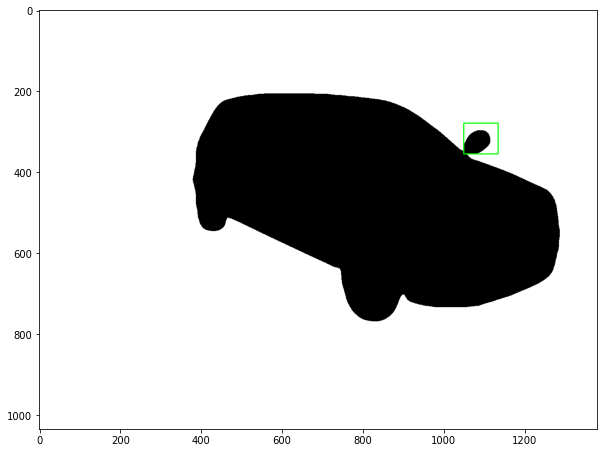

In [27]:
# showing the image with rectangle
print(show_img.shape)
plt.figure(figsize=(10, 12))
plt.imshow(show_img)
plt.savefig("img/editing_mask.png")

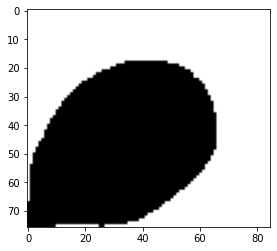

In [28]:
# displaying the image which wil be removed from mask
show_img = np.copy(inverted_img)
plt.imshow(show_img[y:h, x:w])

In [29]:
# making a new mask with removed unwanted parts
new_mask = np.copy(inverted_img)
new_mask[y:h, x:w] = 1

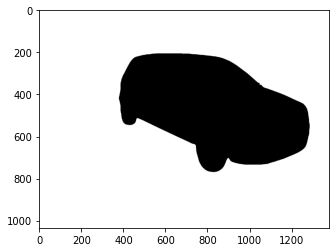

In [30]:
# displaying the new mask
new_mask = np.round(new_mask)
plt.imshow(new_mask)

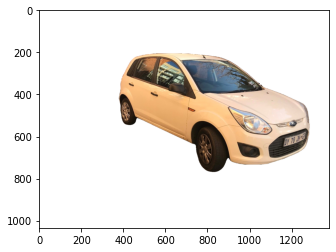

In [31]:
## extracting car from the new mask to get the final result.
img_copy = np.copy(img)
img_copy[new_mask == 1] = 255
plt.imshow(img_copy)
plt.savefig("img/output.png")